In [1]:
import numpy as np
import pandas as pd
from IPython.display import display, HTML, Image
from scipy.stats import ttest_ind_from_stats, spearmanr
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

# Safe Display Utilities
You **_MUST_** use these utilities to display dataframes in this notebook, then update `BLINDED` to `True` prior to pushing.

In [9]:
import inspect

def retrieve_name_in_fn(var):
    callers_local_vars = inspect.currentframe().f_back.f_back.f_locals.items()
    out = [var_name for var_name, var_val in callers_local_vars if var_val is var]
    assert len(out) == 1
    return out[0]

In [10]:
BLINDED = True # MUST ALWAYS BE "TRUE" IF PUSHED
def blind_display(*dfs):
    for df in dfs:
        print(f"{retrieve_name_in_fn(df)}.shape: ", df.shape)
        if BLINDED:
            display(df.head(0))
        else:
            display(df.head())

# Reading Output

In [11]:
LEVEL2 = '../../data/curated/all_hourly_data.h5'
X_level2 = pd.read_hdf(LEVEL2, 'vitals_labs')
X_mean_level2 = pd.read_hdf(LEVEL2, 'vitals_labs_mean')
Y_level2 = pd.read_hdf(LEVEL2, 'interventions')
S_level2 = pd.read_hdf(LEVEL2, 'patients')

In [12]:
blind_display(X_level2, X_mean_level2, Y_level2, S_level2)

print("Old (update if changing the pipeline):")
print("""
X_level2.shape: (2200954, 312)
X_mean_level2.shape: (2200954, 104)
Y_level2.shape: (2200954, 14)
S_level2.shape: (34472, 28)
""")

X_level2.shape:  (2200954, 312)


Empty DataFrame
Columns: [(alanine aminotransferase, count), (alanine aminotransferase, mean), (alanine aminotransferase, std), (albumin, count), (albumin, mean), (albumin, std), (albumin ascites, count), (albumin ascites, mean), (albumin ascites, std), (albumin pleural, count), (albumin pleural, mean), (albumin pleural, std), (albumin urine, count), (albumin urine, mean), (albumin urine, std), (alkaline phosphate, count), (alkaline phosphate, mean), (alkaline phosphate, std), (anion gap, count), (anion gap, mean), (anion gap, std), (asparate aminotransferase, count), (asparate aminotransferase, mean), (asparate aminotransferase, std), (basophils, count), (basophils, mean), (basophils, std), (bicarbonate, count), (bicarbonate, mean), (bicarbonate, std), (bilirubin, count), (bilirubin, mean), (bilirubin, std), (blood urea nitrogen, count), (blood urea nitrogen, mean), (blood urea nitrogen, std), (co2, count), (co2, mean), (co2, std), (co2 (etco2, pco2, etc.), count), (co2 (etco2, pco2, etc.), mean), (co2 (etco2, pco2, etc.), std), (calcium, count), (calcium, mean), (calcium, std), (calcium ionized, count), (calcium ionized, mean), (calcium ionized, std), (calcium urine, count), (calcium urine, mean), (calcium urine, std), (cardiac index, count), (cardiac index, mean), (cardiac index, std), (cardiac output thermodilution, count), (cardiac output thermodilution, mean), (cardiac output thermodilution, std), (cardiac output fick, count), (cardiac output fick, mean), (cardiac output fick, std), (central venous pressure, count), (central venous pressure, mean), (central venous pressure, std), (chloride, count), (chloride, mean), (chloride, std), (chloride urine, count), (chloride urine, mean), (chloride urine, std), (cholesterol, count), (cholesterol, mean), (cholesterol, std), (cholesterol hdl, count), (cholesterol hdl, mean), (cholesterol hdl, std), (cholesterol ldl, count), (cholesterol ldl, mean), (cholesterol ldl, std), (creatinine, count), (creatinine, mean), (creatinine, std), (creatinine ascites, count), (creatinine ascites, mean), (creatinine ascites, std), (creatinine body fluid, count), (creatinine body fluid, mean), (creatinine body fluid, std), (creatinine pleural, count), (creatinine pleural, mean), (creatinine pleural, std), (creatinine urine, count), (creatinine urine, mean), (creatinine urine, std), (diastolic blood pressure, count), (diastolic blood pressure, mean), (diastolic blood pressure, std), (eosinophils, count), (eosinophils, mean), (eosinophils, std), (fibrinogen, count), ...]
Index: []

[0 rows x 312 columns]

X_mean_level2.shape:  (2200954, 104)


,,,LEVEL2,alanine aminotransferase,albumin,albumin ascites,albumin pleural,albumin urine,alkaline phosphate,anion gap,asparate aminotransferase,basophils,bicarbonate,...,total protein,total protein urine,troponin-i,troponin-t,venous pvo2,weight,white blood cell count,white blood cell count urine,ph,ph urine
,,,Aggregation Function,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,...,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
subject_id,hadm_id,icustay_id,hours_in,,,,,,,,,,,,,,,,,,,,,


Y_level2.shape:  (2200954, 14)


,,,,vent,vaso,adenosine,dobutamine,dopamine,epinephrine,isuprel,milrinone,norepinephrine,phenylephrine,vasopressin,colloid_bolus,crystalloid_bolus,nivdurations
subject_id,hadm_id,icustay_id,hours_in,,,,,,,,,,,,,,


S_level2.shape:  (34472, 28)


,,,gender,ethnicity,age,insurance,admittime,diagnosis_at_admission,dischtime,discharge_location,fullcode_first,dnr_first,...,outtime,los_icu,admission_type,first_careunit,mort_icu,mort_hosp,hospital_expire_flag,hospstay_seq,readmission_30,max_hours
subject_id,hadm_id,icustay_id,,,,,,,,,,,,,,,,,,,,,


Old (update if changing the pipeline):

X_level2.shape: (2200954, 312)
X_mean_level2.shape: (2200954, 104)
Y_level2.shape: (2200954, 14)
S_level2.shape: (34472, 28)



In [27]:
ITEMID = '../../data/curated/no_grouping/all_hourly_data.h5'
X_itemid = pd.read_hdf(ITEMID, 'vitals_labs')
X_mean_itemid = pd.read_hdf(ITEMID, 'vitals_labs_mean')

FileNotFoundError: File ../../data/curated/no_grouping/all_hourly_data.h5 does not exist

In [14]:
blind_display(X_itemid, X_mean_itemid)

NameError: name 'X_itemid' is not defined

# Demographics

In [15]:
def categorize_age(age):
    if age > 10 and age <= 30: 
        cat = '<31'
    elif age > 30 and age <= 50:
        cat = '31-50'
    elif age > 50 and age <= 70:
        cat = '51-70'
    else: 
        cat = '>70'
    return cat
def categorize_ethnicity(ethnicity):
    if 'ASIAN' in ethnicity:
        ethnicity = 'ASIAN'
    elif 'WHITE' in ethnicity:
        ethnicity = 'WHITE'
    elif 'HISPANIC' in ethnicity:
        ethnicity = 'HISPANIC/LATINO'
    elif 'BLACK' in ethnicity:
        ethnicity = 'BLACK'
#    elif 'AMERICAN INDIAN' in ethnicity:
#        ethnicity = 'AMERICAN INDIAN'
    else: 
        ethnicity = 'OTHER'
    return ethnicity

In [17]:
S_level2['age_bucket'] = S_level2['age'].apply(categorize_age)
S_level2['ethnicity'] = S_level2['ethnicity'].apply(categorize_ethnicity)

blind_display(S_level2)

S_level2.shape:  (34472, 29)


,,,gender,ethnicity,age,insurance,admittime,diagnosis_at_admission,dischtime,discharge_location,fullcode_first,dnr_first,...,los_icu,admission_type,first_careunit,mort_icu,mort_hosp,hospital_expire_flag,hospstay_seq,readmission_30,max_hours,age_bucket
subject_id,hadm_id,icustay_id,,,,,,,,,,,,,,,,,,,,,


In [18]:
by_ethnicity = S_level2.reset_index().pivot_table(index='ethnicity',
                                                  columns='gender',
                                                  values=['icustay_id','mort_icu','mort_hosp','max_hours'],
                                                  aggfunc={'icustay_id': 'count',
                                                           'mort_icu': 'mean',
                                                           'mort_hosp':'mean',
                                                          'max_hours':'mean'},
                                                  margins=True)
by_ethnicity = by_ethnicity.sort_values(by=('icustay_id','All'))
by_ethnicity = pd.concat([by_ethnicity], keys=['ethnicity'], names=['item'])

by_insurance = S_level2.reset_index().pivot_table(index='insurance',
                                                  columns='gender',
                                                  values=['icustay_id','mort_icu','mort_hosp','max_hours'],
                                                  aggfunc={'icustay_id': 'count',
                                                           'mort_icu': 'mean',
                                                           'mort_hosp':'mean',
                                                          'max_hours':'mean'},
                                                  margins=True)
by_insurance = by_insurance.sort_values(by=('icustay_id','All'))
by_insurance = pd.concat([by_insurance], keys=['insurance'], names=['item'])

by_age = S_level2.reset_index().pivot_table(index='age_bucket',
                                            columns='gender',
                                            values=['icustay_id','mort_icu','mort_hosp','max_hours'],
                                            aggfunc={'icustay_id': 'count',
                                                     'mort_icu': 'mean',
                                                     'mort_hosp':'mean',
                                                          'max_hours':'mean'},
                                            margins=True)
by_age = by_age.sort_values(by=('icustay_id','All'))
by_age = pd.concat([by_age], keys=['age'], names=['item'])

by_admission = S_level2.reset_index().pivot_table(index='admission_type',
                                                  columns='gender',
                                                  values=['icustay_id','mort_icu','mort_hosp','max_hours'],
                                                  aggfunc={'icustay_id': 'count',
                                                           'mort_icu': 'mean',
                                                           'mort_hosp':'mean',
                                                          'max_hours':'mean'},
                                                  margins=True)
by_admission = by_admission.sort_values(by=('icustay_id','All'))
by_admission = pd.concat([by_admission], keys=['admission_type'], names=['item'])

by_unit = S_level2.reset_index().pivot_table(index='first_careunit',
                                              columns='gender',
                                              values=['icustay_id','mort_icu','mort_hosp','max_hours'],
                                              aggfunc={'icustay_id': 'count',
                                                       'mort_icu': 'mean',
                                                       'mort_hosp':'mean',
                                                          'max_hours':'mean'},
                                              margins=True)
by_unit = by_unit.sort_values(by=('icustay_id','All'))
by_unit = pd.concat([by_unit], keys=['first_careunit'], names=['item'])

In [19]:
demographics = pd.concat([by_ethnicity, by_age, by_insurance, by_admission, by_unit],axis=0)
demographics.index.names = ['item','values']
demographics

icustay_id                max_hours             \
gender                                  F      M    All          F          M   
item           values                                                           
ethnicity      ASIAN                  370    472    842  62.227027  63.665254   
               HISPANIC/LATINO        448    689   1137  59.399554  59.854862   
               BLACK                 1448   1219   2667  61.247928  60.150123   
               OTHER                 2061   3122   5183  69.355167  65.557976   
               WHITE                10651  13992  24643  63.180640  61.677887   
               All                  14978  19494  34472  63.706770  62.187442   
age            <31                    748   1084   1832  54.633690  57.380996   
               31-50                 2212   3277   5489  58.920434  58.191028   
               51-70                 4888   8050  12938  63.571399  61.121615   
               >70                   7130   7083  14213  66.236325  65.983340   
               All                  14978  19494  34472  63.706770  62.187442   
insurance      Self Pay               125    352    477  51.832000  54.272727   
               Government             402    648   1050  58.393035  61.504630   
               Medicaid              1186   1596   2782  61.787521  61.651003   
               Private               4415   7431  11846  60.354700  58.865832   
               Medicare              8850   9467  18317  66.045311  65.226154   
               All                  14978  19494  34472  63.706770  62.187442   
admission_type URGENT                 409    528    937  69.383863  66.710227   
               ELECTIVE              2282   3423   5705  58.380368  54.498101   
               EMERGENCY            12287  15543  27830  64.507040  63.727208   
               All                  14978  19494  34472  63.706770  62.187442   
first_careunit TSICU                 1777   2725   4502  61.366348  64.075963   
               CCU                   2185   3008   5193  64.816934  63.652593   
               SICU                  2678   2842   5520  66.326736  65.376144   
               CSRU                  2326   4724   7050  65.334050  57.824090   
               MICU                  6012   6195  12207  62.198436  62.509766   
               All                  14978  19494  34472  63.706770  62.187442   

                                          mort_hosp                      \
gender                                All         F         M       All   
item           values                                                     
ethnicity      ASIAN            63.033254  0.100000  0.095339  0.097387   
               HISPANIC/LATINO  59.675462  0.064732  0.059507  0.061566   
               BLACK            60.746157  0.069061  0.067268  0.068241   
               OTHER            67.067914  0.159631  0.118193  0.134671   
               WHITE            62.327395  0.102526  0.084334  0.092197   
               All              62.847586  0.105955  0.088078  0.095846   
age            <31              56.259279  0.025401  0.042435  0.035480   
               31-50            58.484970  0.057414  0.052487  0.054473   
               51-70            62.047148  0.082242  0.072547  0.076210   
               >70              66.110251  0.145722  0.129183  0.137480   
               All              62.847586  0.105955  0.088078  0.095846   
insurance      Self Pay         53.633124  0.144000  0.107955  0.117400   
               Government       60.313333  0.032338  0.055556  0.046667   
               Medicaid         61.709202  0.075042  0.077694  0.076564   
               Private          59.420733  0.069083  0.060153  0.063481   
               Medicare         65.621936  0.131299  0.113235  0.121963   
               All              62.847586  0.105955  0.088078  0.095846   
admission_type URGENT           67.877268  0.117359  0.100379  0.107791   
               ELECTIVE  

In [20]:
S_level2.isnull().sum()

gender                        0
ethnicity                     0
age                           0
insurance                     0
admittime                     0
diagnosis_at_admission        1
dischtime                     0
discharge_location            0
fullcode_first             6310
dnr_first                  6310
fullcode                   6310
dnr                        6310
dnr_first_charttime       31353
cmo_first                  6310
cmo_last                   6310
cmo                        6310
deathtime                 31122
intime                        0
outtime                       0
los_icu                       0
admission_type                0
first_careunit                0
mort_icu                      0
mort_hosp                     0
hospital_expire_flag          0
hospstay_seq                  0
readmission_30                0
max_hours                     0
age_bucket                    0
dtype: int64

## Histogram - age

Text(0, 0.5, 'count')

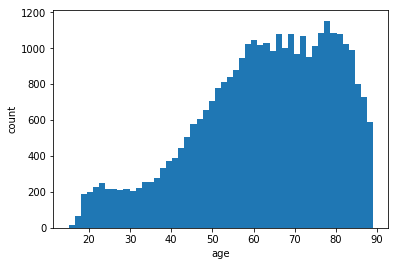

In [21]:
age = S_level2['age']
age = age[age<300]
plt.hist(age, bins=50)
plt.xlabel('age')
plt.ylabel('count')

## Histogram - los

Text(0, 0.5, 'count')

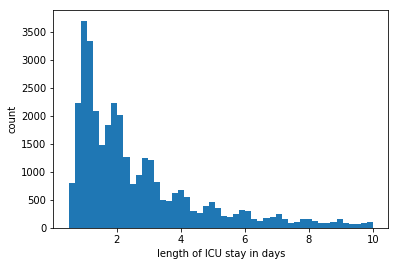

In [22]:
los = S_level2['los_icu']
plt.hist(los, bins=50)
plt.xlabel('length of ICU stay in days')
plt.ylabel('count')

# Vitals and Labs
#### `level2` stats

In [24]:
vitals_mean = pd.DataFrame(X_mean_level2.mean(),columns=['mean'])
vitals_std = pd.DataFrame(X_mean_level2.std(),columns=['stdev'])
vitals_missing = pd.DataFrame(X_mean_level2.isnull().sum()/X_mean_level2.shape[0]*100,columns=['missing percent'])

vitals_summary = pd.concat([vitals_mean,vitals_std,vitals_missing],axis=1)
vitals_summary.index = vitals_summary.index.droplevel(1)
vitals_summary.sort_values(by='missing percent', ascending=True,inplace=True)
vitals_summary

,mean,stdev,missing percent
LEVEL2,,,
heart rate,84.974313,17.271791,10.413939
respiratory rate,19.093328,5.722042,11.835777
systolic blood pressure,121.828655,21.994139,13.258342
diastolic blood pressure,60.891112,14.128354,13.279696
mean blood pressure,79.371499,15.486783,13.712145
oxygen saturation,96.726713,3.591092,14.384808
temperature,36.978373,0.784002,70.541956
glucose,140.489701,57.220265,76.710781
central venous pressure,11.578607,16.097323,80.352247


In [25]:
vitals_summary.to_csv('../resources/level2_stat.csv')

#### `itemid` Stats

In [26]:
vitals_mean_itemid = pd.DataFrame(X_mean_itemid.mean(),columns=['mean'])
vitals_std_itemid = pd.DataFrame(X_mean_itemid.std(),columns=['stdev'])
vitals_missing_itemid = pd.DataFrame(X_mean_itemid.isna().sum()/X_mean_level2.shape[0]*100,columns=['missing percent'])

vitals_summary_itemid = pd.concat([vitals_mean_itemid,vitals_std_itemid,vitals_missing_itemid],axis=1)
vitals_summary_itemid.index = vitals_summary_itemid.index.droplevel(4)
vitals_summary_itemid.sort_values(by='missing percent',ascending=True,inplace=True)
vitals_summary_itemid

NameError: name 'X_mean_itemid' is not defined

In [14]:
vitals_summary_itemid.to_csv('../resources/item_id_stat.csv')

In [3]:
source = pd.read_csv('../resources/itemid_to_variable_map.csv')
source.head()

,LEVEL2,LEVEL1,ALTERNATIVE,STATUS,STATUS NOTE,ITEMID,MIMIC LABEL,UNITNAME,LINKSTO,COUNT,CATEGORY,CONCEPTID,FLUID,LOINC_CODE,DBSOURCE,Unnamed: 15,PARAM_TYPE,NOTE
0,Alanine aminotransferase,Alanine aminotransferase,ALT,ready,NaN,50861,ALANINE AMINOTRANSFERASE (ALT),NaN,labevents,219475.0,CHEMISTRY,NaN,BLOOD,6/1/1742,NaN,NaN,NaN,NaN
1,Alanine aminotransferase,Alanine aminotransferase,ALT,ready,NaN,769,ALT,NaN,chartevents,41594.0,Enzymes,NaN,NaN,NaN,carevue,NaN,NaN,NaN
2,Alanine aminotransferase,Alanine aminotransferase,ALT,ready,NaN,220644,ALT,None,chartevents,37625.0,Labs,NaN,NaN,NaN,metavision,NaN,Numeric,NaN
3,Albumin,Albumin,NaN,ready,NaN,50862,ALBUMIN,NaN,labevents,146697.0,CHEMISTRY,NaN,BLOOD,7/1/1751,NaN,NaN,NaN,NaN
4,Albumin,Albumin,NaN,ready,NaN,772,Albumin (>3.2),NaN,chartevents,31022.0,Chemistry,NaN,NaN,NaN,carevue,NaN,NaN,NaN


In [8]:
source = source.set_index('ITEMID')
source_dict = source['DBSOURCE'].to_dict()

In [23]:
carevue_id = list(source[source['DBSOURCE']=='carevue'].index.values)
nan_id = list(source[source['DBSOURCE'].isnull()].index.values)
metavision_id = list(source[source['DBSOURCE']=='metavision'].index.values)

In [24]:
carevue_id = carevue_id + nan_id
metavision_id = metavision_id + nan_id

In [34]:
len(carevue_id)

9813

In [27]:
idx = pd.IndexSlice
X_mean_carevue = X_mean_itemid.loc[:,idx[carevue_id,:]]

In [72]:
X_mask = X_mean.copy()
for i in X_mask.columns:
    if int(i) >= 50000 and int(i) <= 59000:
        X_mask.loc[:,i] = np.NaN
    elif int(i) > 100000:
        X_mask.loc[:,i] = np.where(X_mask.loc[:,i].isnull(),np.NaN,1)
    else:
        X_mask.loc[:,i] = np.where(X_mask.loc[:,i].isnull(),np.NaN,-1)

In [73]:
idx_source = pd.DataFrame(X_mask.sum(axis=1))

In [74]:
idx_meta = idx_source[idx_source.loc[:,0]>-1]
idx_care = idx_source[idx_source.loc[:,0]<1]

In [92]:
X_mean_level2.columns = X_mean_level2.columns.droplevel(1)

In [93]:
X_mean_carevue_level2 = X_mean_level2.merge(idx_care, right_index=True, left_index=True, how='right')
X_mean_metavision_level2 = X_mean_level2.merge(idx_meta, right_index=True, left_index=True, how='right')

In [95]:
X_mean_carevue_level2.shape

(1343019, 105)

In [96]:
carevue_missing_level2 = pd.DataFrame(X_mean_carevue_level2.isna().sum()/X_mean_carevue_level2.shape[0]*100,
                                      columns=['missing percent_carevue'])
metavision_missing_level2 = pd.DataFrame(X_mean_metavision_level2.isna().sum()/X_mean_metavision_level2.shape[0]*100,
                                      columns=['missing percent_metavision'])
missing_level2 = pd.concat([carevue_missing_level2,metavision_missing_level2],axis=1)

In [97]:
missing_level2.to_csv('../resources/missing_level2_by_source.csv')

In [98]:
missing_level2

,missing percent_carevue,missing percent_metavision
alanine aminotransferase,98.494213,97.513215
albumin,98.910514,98.483743
albumin ascites,99.995235,99.993944
albumin pleural,99.993299,99.993271
albumin urine,99.993969,99.994713
alkaline phosphate,98.540527,97.572431
anion gap,93.631885,89.852623
asparate aminotransferase,98.493916,97.509851
basophils,99.125254,98.955452
bicarbonate,93.156389,89.533472


In [76]:
X_mean_carevue.shape

(1343019, 183)

In [81]:
carevue_missing_itemid = pd.DataFrame(X_mean_carevue.isna().sum()/X_mean_carevue.shape[0]*100,
                                      columns=['missing percent_carevue'])
metavision_missing_itemid = pd.DataFrame(X_mean_metavision.isna().sum()/X_mean_metavision.shape[0]*100,
                                      columns=['missing percent_metavision'])
missing_itemid = pd.concat([carevue_missing_itemid,metavision_missing_itemid],axis=1)

In [86]:
missing_itemid.to_csv('../resources/missing_itemid_by_source.csv')

In [77]:
X_mean_metavision.shape

(1040259, 183)

In [71]:
X_mean.shape

(2200954, 182)

In [59]:
idx_meta.shape

(2200954, 1)

In [30]:
X_mean = X_mean_itemid.copy()
X_mean.columns = X_mean.columns.droplevel([1,2,3,4])

KeyError: u"None of [Int64Index([  769,   772,  1521,  3727,   773,  3728,  3732,   770,   803,\n             1538,\n            ...\n            51545, 51546, 51547, 51548, 51549, 51550, 51551, 51552, 51553,\n            51554],\n           dtype='int64', name=u'itemid', length=9813)] are in the [columns]"

## Interventions

In [28]:
mean_duration = pd.DataFrame(Y_level2.reset_index().groupby('icustay_id').agg(sum).mean()[3:],columns=['hours'])

In [29]:
# average duration of each intervention given for one icu stay 
# (colloid bolus, crystalloid bolus - number of times given)
mean_duration

,hours
vent,12.200743
vaso,8.099124
adenosine,0.001508
dobutamine,0.356782
dopamine,0.948364
epinephrine,0.598399
isuprel,0.005483
milrinone,0.871838
norepinephrine,2.720933
phenylephrine,4.055697
